<a href="https://colab.research.google.com/github/skaty5678/Book-recommendation-system/blob/main/Book_Recommendation_System_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Creating a book recommender system for users.**

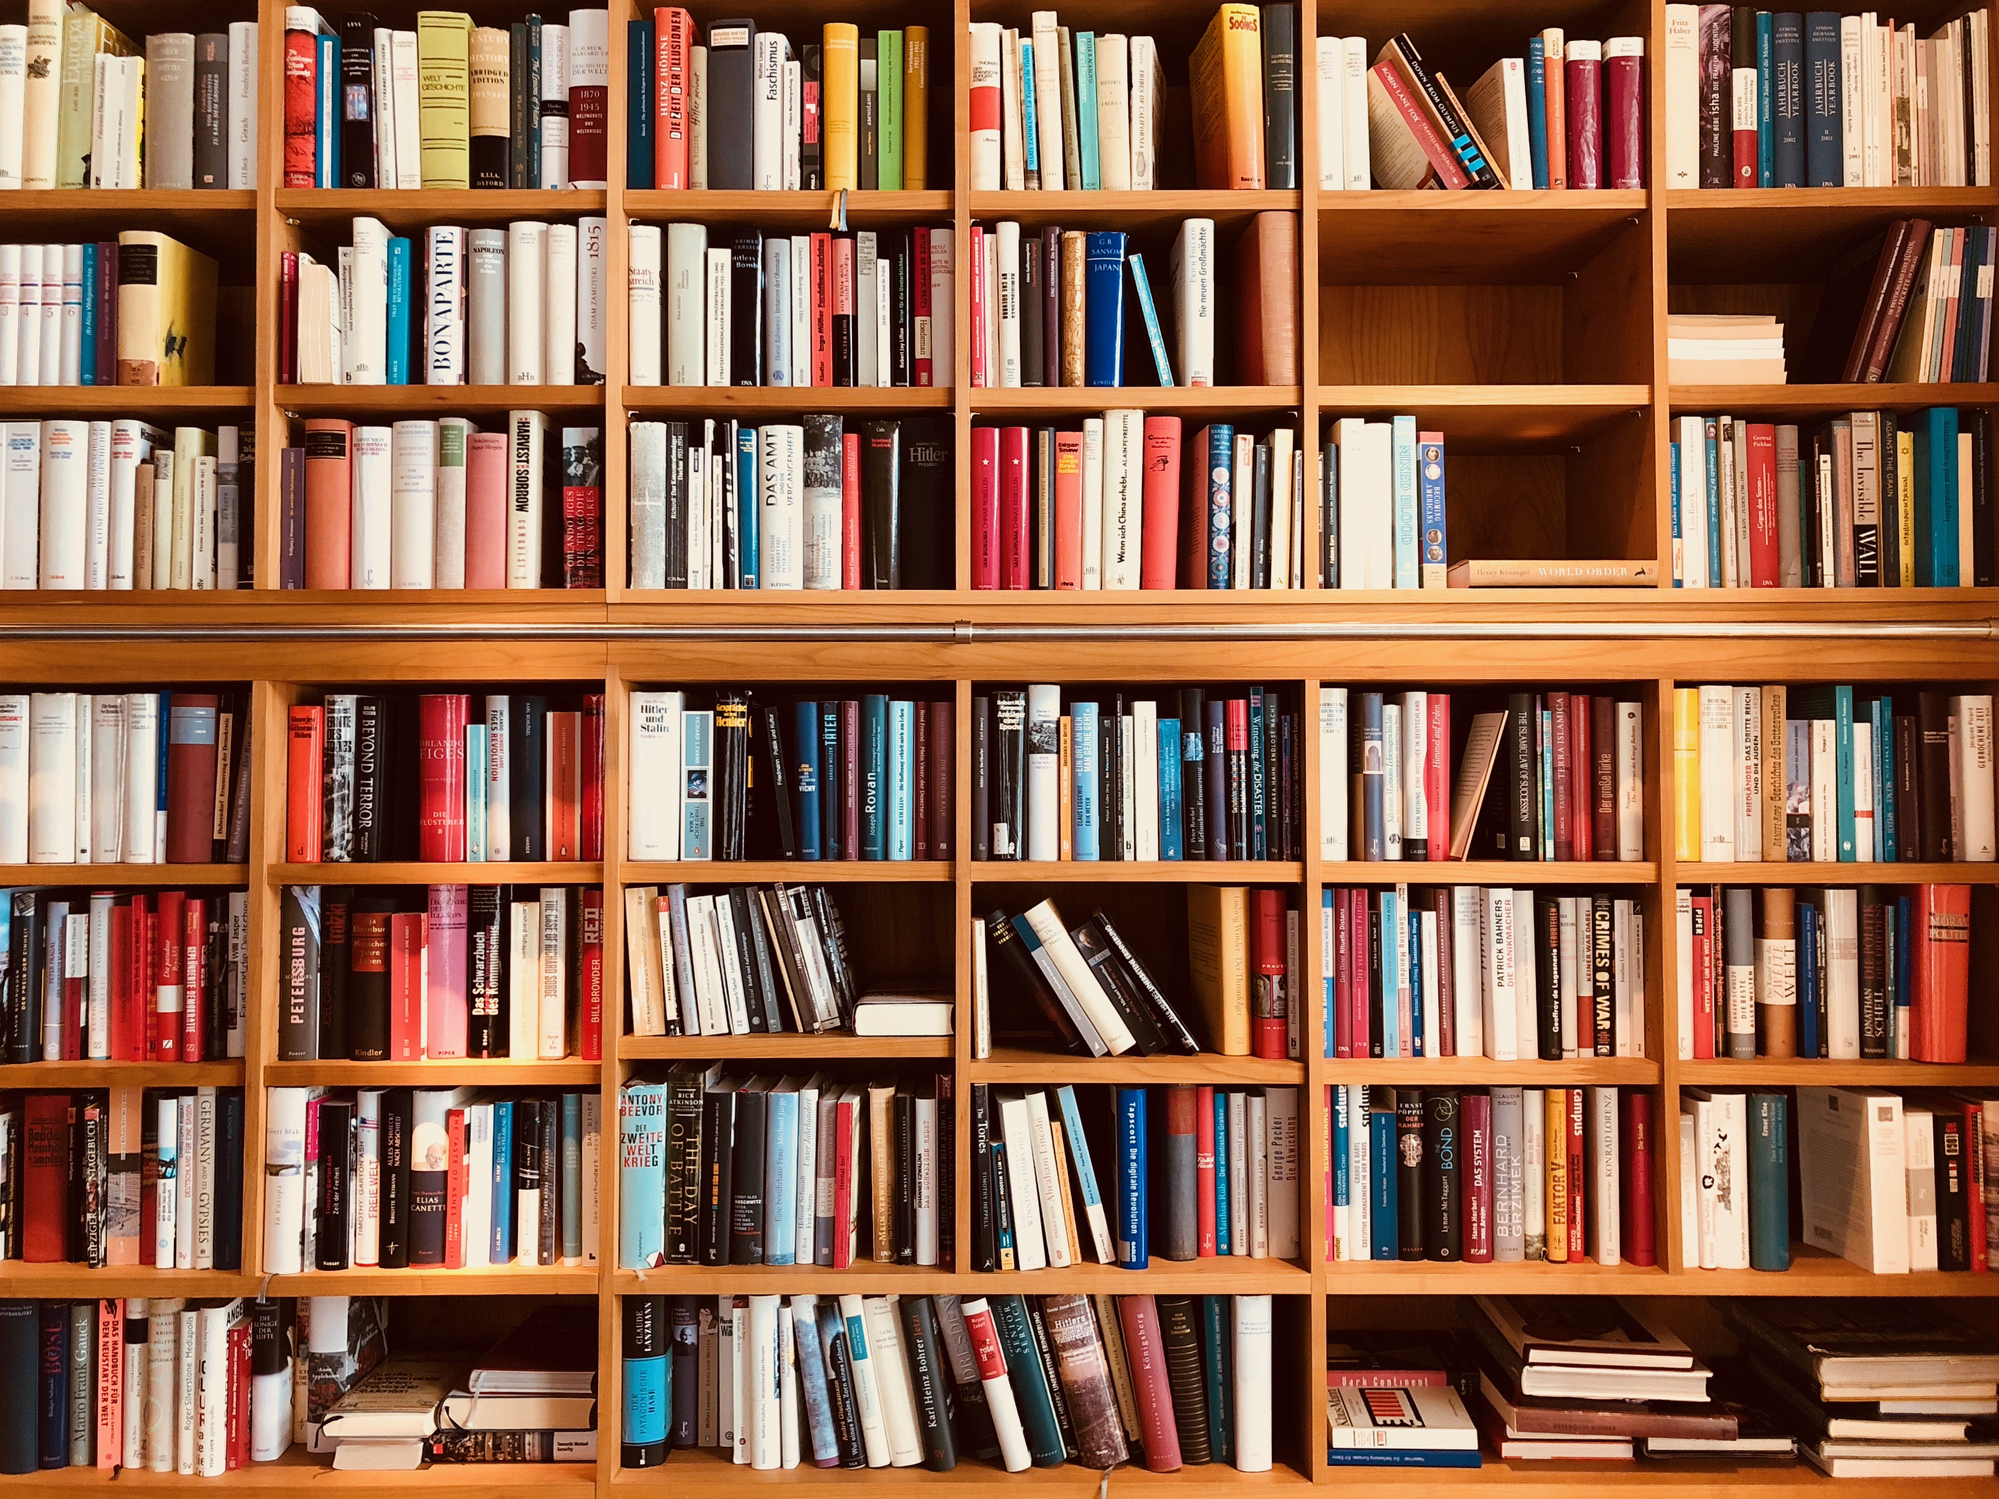

#**Problem Description**

###During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

###In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

###Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

##**Data Description**

The Book-Crossing dataset comprises 3 files.

##● **Users**

Contains the users. Note that user IDs (   ) have been anonymized and map to integers. Demographic data is provided (   , Age) if available. Otherwise, these fields contain NULL values.

##● **Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

##● **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

        

#**Setting the stage for our dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_books = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Books.csv')
raw_users = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Users.csv')
raw_ratings = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Ratings.csv')

#**Data Preparation for Exploratory Data Analysis and Visualizations.**

##Before we feed the data to our models. First we will try to interpret what the data is trying to convey by extracting necessary information from it using EDA and graphical visualisations.

## We will go through the 3 csv files one by one and try to extract useful information.

##**BOOKS**

In [4]:
raw_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
#making a copy
books = raw_books.copy()

###We will drop the columns that primarily don't seem important for the book recommendation.

In [6]:
#drop the columns that are not necessary
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace = True)

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [8]:
#renaming some of the column names
dict = {'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'publication_year',
        'Publisher':'publisher'}

books.rename(columns=dict,inplace=True)

In [9]:
#dropping the null values
books[books.isna().any(axis=1)]
books.dropna(inplace=True) 

In [10]:
books['publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
#fixing the errors in the publication year column
books.loc[(books['publication_year'] == 'DK Publishing Inc') | (books['publication_year'] == 'Gallimard')]

#dropping the rows with errors as they are very few in number
books.drop(books[books['publication_year'] == 'DK Publishing Inc'].index, inplace = True)
books.drop(books[books['publication_year'] == 'Gallimard'].index, inplace = True)

In [12]:
#changing the publication year to int type before feeding it to the models
books['publication_year'] = books['publication_year'].astype('int')

In [13]:
print(sorted(books['publication_year'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


###We have some entries in the publication year as 0 which might be due to some errors.We won't be dropping those entries as we will lose a good amount of data instead we will replace them with the mean year.As they are relevant for EDA purpose only so that won't hamper our model performance, hopefully.

In [14]:
#replacing the publication with 0 input with nan values
books.loc[(books['publication_year'] == 0)] = np.nan

#replacing the nan values in the publication year with mean of the same column
books['publication_year'].fillna((books['publication_year'].mean()), inplace=True)

#converting to integer type
books['publication_year'] = books['publication_year'].astype('int')


In [15]:
books['publication_year'].value_counts()[:10]

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
1993    15220
1997    14890
2003    14358
1996    14030
1995    13545
Name: publication_year, dtype: int64

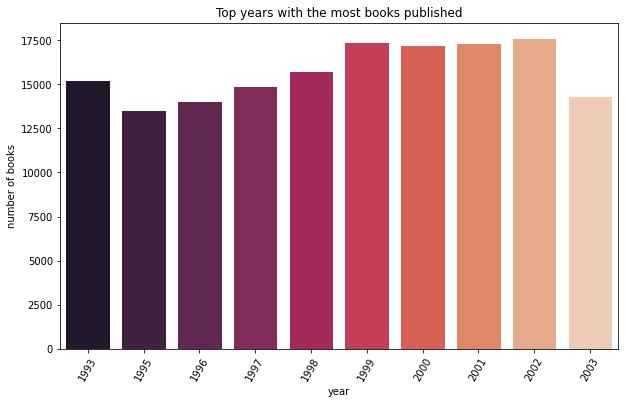

In [16]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publication_year'].value_counts()[:10].index,y = books['publication_year'].value_counts()[:10].values,
            palette = 'rocket').set(title = 'Top years with the most books published',xlabel = 'year',ylabel = 'number of books')
plt.xticks(rotation = 60)
plt.show()

###Year 2000 has seen the most number of books being published around 17500 books. The ten year period stretching from 1993 to 2003 has seen a good number of book publications.

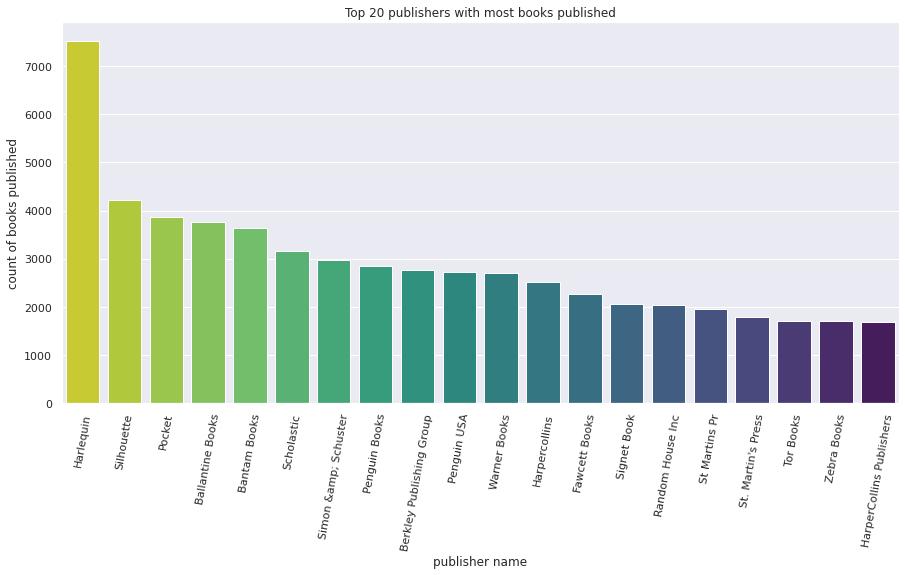

In [17]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publisher'].value_counts()[:20].index,y = books['publisher'].value_counts()[:20].values,
            palette = 'viridis_r').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

###Harlequin can be seen as the publication house that has published the most number of books almost close to 7600 books, followed by Silhouette then Pocket and others in the sequence.

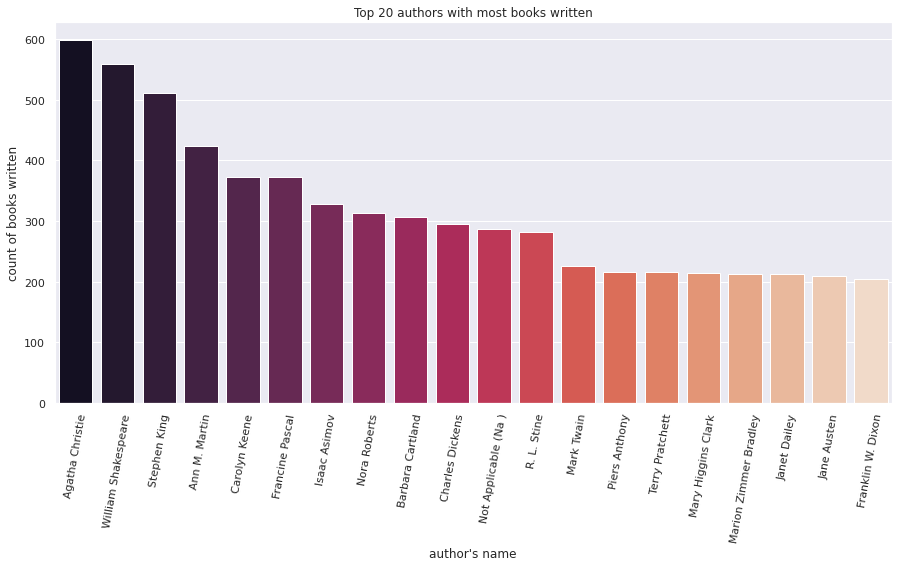

In [18]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['author'].value_counts()[:20].index,y = books['author'].value_counts()[:20].values,
            palette = 'rocket').set(title = 'Top 20 authors with most books written',xlabel = "author's name",ylabel = 'count of books written')
plt.xticks(rotation = 80)
plt.show()

###Agatha Christie has authored the most books in our dataset with 600 books. William Shakespeare, Stephen Hawking and Ann M. Martin are also some of the authors who have written 400 - 500 books.

##**USERS**

In [21]:
raw_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
#making a copy
users = raw_users.copy()

In [20]:
dict = {'User-ID': 'userID',
        'Age':'age'}

users.rename(columns=dict,inplace=True)

In [22]:
users.head()

,userID,Location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [24]:
print(sorted(users['age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

###As can be seen from the values that there are people who are 0 years old and also we have people who are 244 years old which is for sure an error so we will keep the age group only from 5 years old to 85 years old and for the rest we will replace them with mean of the age.

In [25]:
#replacing the less than 5 and more than 85 values with mean of the age   
users.loc[(users['age'] < 5) | (users['age'] > 85),'age'] = np.nan
users['age'].fillna((users['age'].mean()), inplace=True)

print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.71685995610511, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]


In [26]:
#converting the age to integer type 
users['age'] = users['age'].astype('int')

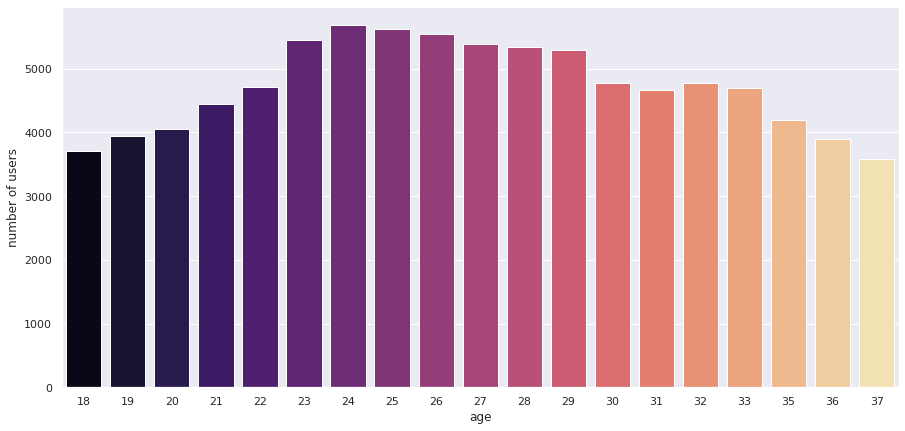

In [27]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = users['age'].value_counts()[1:20].index,y = users['age'].value_counts()[1:20].values,
            palette = 'magma').set(xlabel = "age",ylabel = 'number of users')
plt.show()

###The most number of users in our dataset are from the age group 23 years to 30 years old.

##**RATINGS**

In [28]:
raw_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [29]:
ratings = raw_ratings.copy()

In [30]:
dict = {'User-ID': 'userID',
        'Book-Rating':'book_rating'}

ratings.rename(columns=dict,inplace=True)

In [31]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [32]:
#keeping only the records of ratings for the books and users whose data is there in the respective users and books csv file
new_ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]
new_ratings = new_ratings[new_ratings['userID'].isin(users['userID'])]


In [33]:
new_ratings.head()

,userID,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
new_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017120 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   userID       1017120 non-null  int64 
 1   ISBN         1017120 non-null  object
 2   book_rating  1017120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.0+ MB


In [35]:
#dropping the books whose ratings are zero
new_ratings = new_ratings.loc[new_ratings['book_rating'] != 0]

In [36]:
new_ratings['userID'].value_counts()[:10]

11676     6782
98391     5689
189835    1898
153662    1833
23902     1102
235105    1017
76499     1011
16795      956
171118     954
248718     935
Name: userID, dtype: int64

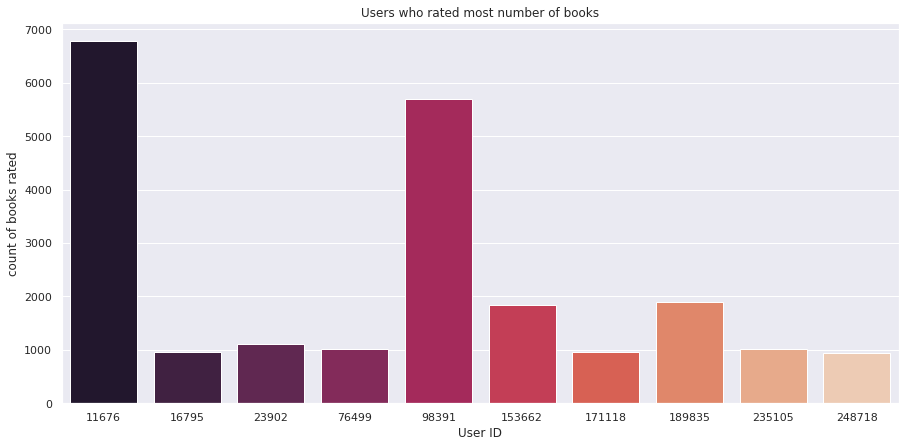

In [37]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['userID'].value_counts()[0:10].index,y = new_ratings['userID'].value_counts()[0:10].values,
            palette = 'rocket').set(title="Users who rated most number of books",xlabel = "User ID",ylabel = 'count of books rated')
plt.show()

###Users with id 11676 and 98391 have rated the most number of books. They seem to be an avid reader of books.

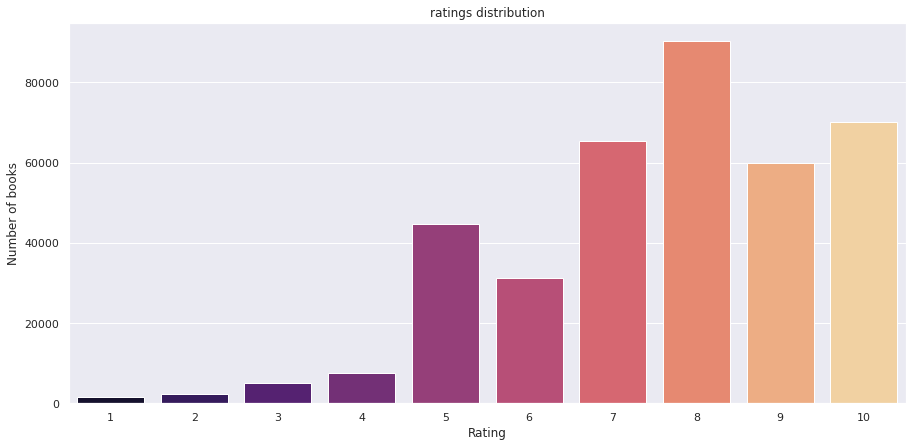

In [38]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = new_ratings['book_rating'].value_counts().index,y = new_ratings['book_rating'].value_counts().values,
            palette = 'magma').set(title="ratings distribution",xlabel = "Rating",ylabel = 'Number of books')
plt.show()

###The users in our dataset seem to be quite generous while rating the books as the rating 7 and above are quite normal whereas comparatively rating 4 and below are very few in number.

#**POPULARITY BASED MODEL**

##**Highest total book rating**
###Books are arranged in such a way that the books with the highest sum total of ratings are at the top. 

In [39]:
ratings_sum=pd.DataFrame(new_ratings.groupby(['ISBN'])['book_rating'].sum())

In [40]:
merged_df_1 = ratings_sum.merge(books, left_index=True, right_on ='ISBN')

In [41]:
final_sum_df = merged_df_1.sort_values(by=['book_rating'], ascending=False)

In [42]:
final_sum_df.head(10)

,book_rating,ISBN,title,author,publication_year,publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


##**Most number of times rated**

###Books are arranged in such a way that books that have been rated the most number of times irrespective of the rating are at the top.

In [43]:
ratings_count=pd.DataFrame(new_ratings.groupby(['ISBN'])['book_rating'].count())


In [44]:
merged_df_2 = ratings_count.merge(books, left_index=True, right_on ='ISBN')

In [45]:
final_count_df = merged_df_2.sort_values(by=['book_rating'], ascending=False)


In [46]:
final_count_df.head(10)


,book_rating,ISBN,title,author,publication_year,publisher
408,707,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
26,581,0971880107,Wild Animus,Rich Shapero,2004,Too Far
748,487,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,383,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1105,320,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
2143,313,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,307,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
706,295,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
305,281,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
231,278,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


#**MEMORY BASED COLLABORATIVE FILTERING - ITEM BASED**

In [47]:
#merging the books, users and ratings file
merge_df_1=books.merge(ratings,how="left", on="ISBN")
merge_df_2=merge_df_1.merge(users,how="left", on="userID")
df=merge_df_2.copy()
df.head()

,ISBN,title,author,publication_year,publisher,userID,book_rating,Location,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",34.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",34.0


In [48]:
#dropping the location and age columns as they are not relevant for recommender model
df.drop(['Location','age'], axis=1, inplace=True)

In [49]:
df.shape

(1022926, 7)

In [50]:
#we will only keep the observations that have book_rating greater than 0
df = df[df["book_rating"]>0]

In [51]:
df.shape

(378055, 7)

In [52]:
#counting the number of times the books have been rated
count_of_books = pd.DataFrame(df["title"].value_counts())

In [53]:
count_of_books.sort_values("title", ascending=False)

,title
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
...,...
I Couldn't Care Less,1
The Starplace (Novel),1
A Woman and Catholicism: My Break With the Roman Catholic Church,1
Trove,1


In [54]:
#All the books that have been rated less than 100 times - we will count them as rarely read books
rare_books = count_of_books[count_of_books["title"] <= 100].index

In [55]:
rare_books.shape

(133186,)

In [56]:
#All the books that are not in the rare books we will count them as frequently read books
frequent_books = df[~df["title"].isin(rare_books)]
frequent_books.head()

,ISBN,title,author,publication_year,publisher,userID,book_rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676.0,9.0
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526.0,9.0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398.0,9.0
36,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,49635.0,9.0
37,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,67958.0,10.0


In [58]:
#Let's create the User-Book matrix for the frequently read books
books_user_df = frequent_books.pivot_table(index=["userID"], columns=["title"], values="book_rating",fill_value=0)
books_user_df.head()

title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,"A Child Called \It\"": One Child's Courage to Survive""",A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),A Walk to Remember,ANGELA'S ASHES,About a Boy,Airframe,Along Came a Spider (Alex Cross Novels),American Gods,Angela's Ashes (MMP) : A Memoir,Angels &amp; Demons,Animal Farm,"Artemis Fowl (Artemis Fowl, Book 1)",Back Roads,Balzac and the Little Chinese Seamstress : A Novel,Bel Canto: A Novel,Black House,Black Notice,Brave New World,Bridget Jones's Diary,Bridget Jones: The Edge of Reason,Chocolat,Cold Mountain : A Novel,Confessions of a Shopaholic (Summer Display Opportunity),Cradle and All,Dance upon the Air (Three Sisters Island Trilogy),Digital Fortress : A Thriller,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Dolores Claiborne,Dreamcatcher,Empire Falls,...,The No. 1 Ladies' Detective Agency (Today Show Book Club #8),The Notebook,The Partner,The Pelican Brief,The Perfect Storm : A True Story of Men Against the Sea,The Pilot's Wife : A Novel,The Poisonwood Bible,The Poisonwood Bible: A Novel,The Rainmaker,The Reader,The Red Tent (Bestselling Backlist),The Rescue,"The Return of the King (The Lord of the Rings, Part 3)",The Runaway Jury,The Secret Life of Bees,The Smoke Jumper,The Street Lawyer,"The Subtle Knife (His Dark Materials, Book 2)",The Summons,The Tao of Pooh,The Testament,"The Two Towers (The Lord of the Rings, Part 2)","The Vampire Lestat (Vampire Chronicles, Book II)",The Witching Hour (Lives of the Mayfair Witches),Timeline,To Kill a Mockingbird,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Two for the Dough,Unnatural Exposure,Violets Are Blue,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
26.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,10,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
32.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
51.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0
91.0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.0,0,...,0,0.0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0


In [59]:
books_user_df.shape

(16349, 191)

In [60]:
book="To Kill a Mockingbird"

In [61]:
book=books_user_df[book]
book.sort_values(ascending=False)

userID
106007.0    10
128622.0    10
37712.0     10
80684.0     10
95359.0     10
            ..
93312.0      0
93314.0      0
93333.0      0
93358.0      0
278846.0     0
Name: To Kill a Mockingbird, Length: 16349, dtype: int64

In [62]:
books_user_df.corrwith(book,method='pearson').sort_values(ascending=False)[:10]


title
To Kill a Mockingbird                                            1.000000
Lord of the Flies                                                0.081590
The Catcher in the Rye                                           0.080984
The Color Purple                                                 0.072714
Brave New World                                                  0.070907
Fried Green Tomatoes at the Whistle Stop Cafe                    0.062260
Snow Falling on Cedars                                           0.058128
Animal Farm                                                      0.057240
The Color of Water: A Black Man's Tribute to His White Mother    0.055991
Harry Potter and the Chamber of Secrets (Book 2)                 0.054521
dtype: float64

In [63]:
recommend_books=books_user_df.corrwith(book).sort_values(ascending=False)[:10]
rec_books_list=list(recommend_books.index)

rec_books_list

['To Kill a Mockingbird',
 'Lord of the Flies',
 'The Catcher in the Rye',
 'The Color Purple',
 'Brave New World',
 'Fried Green Tomatoes at the Whistle Stop Cafe',
 'Snow Falling on Cedars',
 'Animal Farm',
 "The Color of Water: A Black Man's Tribute to His White Mother",
 'Harry Potter and the Chamber of Secrets (Book 2)']

#**MEMORY BASED COLLABORATIVE FILTERING - ITEM BASED 2**

In [64]:
#All the books that have been rated less than 100 times - we will count them as rarely read books
rare_books = count_of_books[count_of_books["title"] <= 50].index

In [65]:
rare_books.shape

(132756,)

In [66]:
#All the books that are not in the rare books we will count them as frequently read books
frequent_books = df[~df["title"].isin(rare_books)]
frequent_books.head()

,ISBN,title,author,publication_year,publisher,userID,book_rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676.0,9.0
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526.0,9.0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398.0,9.0
36,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,49635.0,9.0
37,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,67958.0,10.0


In [67]:
#Let's create the User-Book matrix for the frequently read books
books_user_df = frequent_books.pivot_table(index=["userID"], columns=["title"], values="book_rating",fill_value=0)
books_user_df.head()

title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Confederacy of Dunces (Evergreen Book),A Darkness More Than Night,A Fine Balance,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Lesson Before Dying (Vintage Contemporaries (Paperback)),A Man Named Dave: A Story of Triumph and Forgiveness,A Man in Full,A Map of the World,A Painted House,A Patchwork Planet,A Prayer for Owen Meany,A Separate Peace,A Thousand Acres (Ballantine Reader's Circle),A Time to Kill,A Virtuous Woman (Oprah's Book Club (Paperback)),A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail),A Walk to Remember,A Widow for One Year,A Wrinkle In Time,A Wrinkle in Time,A Year in Provence,ANGELA'S ASHES,About a Boy,About a Boy (Movie Tie-In),Absolute Power,"Ahab's Wife: Or, The Star-Gazer: A Novel",Airframe,All Around the Town,All I Really Need to Know,All That Remains (Kay Scarpetta Mysteries (Paperback)),Along Came a Spider (Alex Cross Novels),American Gods,...,To the Nines: A Stephanie Plum Novel,Total Control,Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2),"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Two for the Dough,Under the Tuscan Sun,Unnatural Exposure,Unspeakable,Vinegar Hill (Oprah's Book Club (Paperback)),Violets Are Blue,Visions of Sugar Plums,Voyager,Watchers,Watership Down,We Were the Mulvaneys,We'll Meet Again,"Welcome to the World, Baby Girl!",What Looks Like Crazy On An Ordinary Day,What to Expect When You're Expecting (Revised Edition),What to Expect the First Year,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),Where the Red Fern Grows,While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),White Teeth: A Novel,Who Moved My Cheese? An Amazing Way to Deal with Change in Your Work and in Your Life,Wicked: The Life and Times of the Wicked Witch of the West,Wifey,Wild Animus,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
books_user_df.shape

(24407, 621)

In [69]:
book="To Kill a Mockingbird"

In [70]:
book=books_user_df[book]
book.sort_values(ascending=False)

userID
53117.0     10
115700.0    10
199041.0    10
59038.0     10
211919.0    10
            ..
93675.0      0
93672.0      0
93667.0      0
93666.0      0
278854.0     0
Name: To Kill a Mockingbird, Length: 24407, dtype: int64

In [71]:
books_user_df.corrwith(book,method='pearson').sort_values(ascending=False)[:10]


title
To Kill a Mockingbird                                        1.000000
The Catcher in the Rye                                       0.085705
Lord of the Flies                                            0.084836
The Color Purple                                             0.076314
Brave New World                                              0.074138
Of Mice and Men (Penguin Great Books of the 20th Century)    0.070730
Fried Green Tomatoes at the Whistle Stop Cafe                0.065619
Rebecca                                                      0.065225
Snow Falling on Cedars                                       0.063134
Wuthering Heights                                            0.063071
dtype: float64

In [72]:
recommend_books=books_user_df.corrwith(book).sort_values(ascending=False)[:10]
rec_books_list=list(recommend_books.index)

rec_books_list

['To Kill a Mockingbird',
 'The Catcher in the Rye',
 'Lord of the Flies',
 'The Color Purple',
 'Brave New World',
 'Of Mice and Men (Penguin Great Books of the 20th Century)',
 'Fried Green Tomatoes at the Whistle Stop Cafe',
 'Rebecca',
 'Snow Falling on Cedars',
 'Wuthering Heights']

#**MODEL BASED COLLABORATIVE FILTERING 1**

In [75]:
%%capture
pip install scikit-surprise

In [76]:
from surprise import NMF, SVD, SVDpp, KNNBasic, KNNWithMeans, KNNWithZScore, CoClustering
from surprise.model_selection import cross_validate
from surprise import Reader, Dataset

In [77]:
df_surprise1 = df[['userID','title','book_rating']]

In [78]:
df_surprise1.head(10)

,userID,title,book_rating
1,8.0,Clara Callan,5.0
3,11676.0,Clara Callan,8.0
5,67544.0,Clara Callan,8.0
8,116866.0,Clara Callan,9.0
9,123629.0,Clara Callan,9.0
11,200273.0,Clara Callan,8.0
12,210926.0,Clara Callan,9.0
13,219008.0,Clara Callan,7.0
14,263325.0,Clara Callan,6.0
16,2954.0,Decision in Normandy,8.0


In [79]:
df_surprise1.columns = ['userID', 'itemID', 'rating']


In [80]:
df_surprise1.head()

,userID,itemID,rating
1,8.0,Clara Callan,5.0
3,11676.0,Clara Callan,8.0
5,67544.0,Clara Callan,8.0
8,116866.0,Clara Callan,9.0
9,123629.0,Clara Callan,9.0


In [81]:
df_surprise1['reviews'] = df_surprise1.groupby(['itemID'])['rating'].transform('count')


In [82]:
df_surprise1= df_surprise1[df_surprise1.reviews>100][['userID', 'itemID', 'rating']]
df_surprise1.shape

(33491, 3)

In [83]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_surprise1, reader)

In [84]:
# get the list of the movie ids
unique_ids = df_surprise1['itemID'].unique()

# get the list of the ids that the userid 1001 has rated
iids1001 = df_surprise1.loc[df_surprise1['userID']==1001, 'itemID']

# remove the rated movies for the recommendations
movies_to_predict = np.setdiff1d(unique_ids,iids1001)

In [85]:
algo = NMF()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

,iid,predictions
0,1984,7.85838
131,The Girls' Guide to Hunting and Fishing,7.85838
122,The Cider House Rules,7.85838
123,The Client,7.85838
124,The Color Purple,7.85838
125,The Color of Water: A Black Man's Tribute to H...,7.85838
126,The Da Vinci Code,7.85838
127,The Divine Secrets of the Ya-Ya Sisterhood: A ...,7.85838
128,The Fellowship of the Ring (The Lord of the Ri...,7.85838
129,The Firm,7.85838


In [86]:
algo = SVD()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

,iid,predictions
172,"The Two Towers (The Lord of the Rings, Part 2)",9.137261
163,"The Return of the King (The Lord of the Rings,...",9.085379
176,To Kill a Mockingbird,8.929813
57,Harry Potter and the Sorcerer's Stone (Book 1),8.921248
40,Ender's Game (Ender Wiggins Saga (Paperback)),8.918292
54,Harry Potter and the Goblet of Fire (Book 4),8.905920
55,Harry Potter and the Order of the Phoenix (Boo...,8.898907
58,Harry Potter and the Sorcerer's Stone (Harry P...,8.857442
56,Harry Potter and the Prisoner of Azkaban (Book 3),8.853086
128,The Fellowship of the Ring (The Lord of the Ri...,8.792652


In [87]:
algo = SVDpp()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

,iid,predictions
40,Ender's Game (Ender Wiggins Saga (Paperback)),8.859301
163,"The Return of the King (The Lord of the Rings,...",8.763644
176,To Kill a Mockingbird,8.762657
172,"The Two Towers (The Lord of the Rings, Part 2)",8.736409
41,Fahrenheit 451,8.711938
0,1984,8.687625
132,The Giver (21st Century Reference),8.656572
57,Harry Potter and the Sorcerer's Stone (Book 1),8.578193
55,Harry Potter and the Order of the Phoenix (Boo...,8.543694
157,The Poisonwood Bible,8.507733


In [88]:
algo = KNNWithZScore()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

Computing the msd similarity matrix...
Done computing similarity matrix.


,iid,predictions
0,1984,7.85838
131,The Girls' Guide to Hunting and Fishing,7.85838
122,The Cider House Rules,7.85838
123,The Client,7.85838
124,The Color Purple,7.85838
125,The Color of Water: A Black Man's Tribute to H...,7.85838
126,The Da Vinci Code,7.85838
127,The Divine Secrets of the Ya-Ya Sisterhood: A ...,7.85838
128,The Fellowship of the Ring (The Lord of the Ri...,7.85838
129,The Firm,7.85838


In [89]:
algo = CoClustering()
algo.fit(data.build_full_trainset())

my_recs = []
for iid in movies_to_predict:
    my_recs.append((iid, algo.predict(uid=1001,iid=iid).est))
    
pd.DataFrame(my_recs, columns=['iid', 'predictions']).sort_values('predictions', ascending=False).head(10)

,iid,predictions
0,1984,7.85838
131,The Girls' Guide to Hunting and Fishing,7.85838
122,The Cider House Rules,7.85838
123,The Client,7.85838
124,The Color Purple,7.85838
125,The Color of Water: A Black Man's Tribute to H...,7.85838
126,The Da Vinci Code,7.85838
127,The Divine Secrets of the Ya-Ya Sisterhood: A ...,7.85838
128,The Fellowship of the Ring (The Lord of the Ri...,7.85838
129,The Firm,7.85838


In [90]:
cv = []
# Iterate over all recommender system algorithms
for recsys in [NMF(), SVD(), SVDpp(), KNNWithZScore(), CoClustering()]:
    # Perform cross validation
    tmp = cross_validate(recsys, data, measures=['RMSE'], cv=3, verbose=False)
    cv.append((str(recsys).split(' ')[0].split('.')[-1], tmp['test_rmse'].mean()))

pd.DataFrame(cv, columns=['RecSys', 'RMSE'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,RecSys,RMSE
0,NMF,2.509045
1,SVD,1.653969
2,SVDpp,1.702037
3,KNNWithZScore,1.874096
4,CoClustering,1.821279


#**MODEL BASED COLLABORATIVE FILTERING 2**

In [91]:
books = books[['ISBN','title']]

In [92]:
books.head()

,ISBN,title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


In [93]:
ratings.rename(columns={'book_rating':'rating'},inplace=True)

In [94]:
ratings.head()

,userID,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [95]:
min_book_ratings = 50 #a book was rated at least 
min_user_ratings =  50 #a user rated books at least


ratings_flrd_df = ratings.groupby("ISBN").filter(lambda x: x['ISBN'].count() >= min_book_ratings)
ratings_flrd_df = ratings_flrd_df.groupby("userID").filter(lambda x: x['userID'].count() >= min_user_ratings)



"{0} movies deleted; all movies are now rated at least: {1} times. Old dimensions: {2}; New dimensions: {3}"\
.format(len(ratings.ISBN.value_counts()) - len(ratings_flrd_df.ISBN.value_counts())\
        ,min_book_ratings,ratings.shape, ratings_flrd_df.shape )

'338371 movies deleted; all movies are now rated at least: 50 times. Old dimensions: (1149780, 3); New dimensions: (96448, 3)'

In [96]:
ratings_flrd_df['rating'].value_counts()

0     72339
8      6066
10     4969
9      4699
7      3877
5      2211
6      1615
4       326
3       177
2        92
1        77
Name: rating, dtype: int64

In [97]:
ratings_flrd_df.head()

,userID,ISBN,rating
1456,277427,002542730X,10
1468,277427,006092988X,0
1469,277427,0060930535,0
1470,277427,0060932139,0
1471,277427,0060934417,0


In [98]:
reader = Reader(rating_scale=(1,10)) #line_format by default order of the fields
data = Dataset.load_from_df(ratings_flrd_df[["userID",	"ISBN",	"rating"]], reader=reader)

trainset = data.build_full_trainset()

testset = trainset.build_anti_testset()

In [99]:
algo_SVD = SVD(n_factors = 11)
algo_SVD.fit(trainset)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
testset = trainset.build_anti_testset()

predictions = algo_SVD.test(testset)

# subset of the list  predictions
predictions[0:2]

[Prediction(uid=277427, iid='0020442203', r_ui=1.9750435467816854, est=3.7232665498448396, details={'was_impossible': False}),
 Prediction(uid=277427, iid='0028604199', r_ui=1.9750435467816854, est=3.0458125939756275, details={'was_impossible': False})]

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF

np.random.seed(42) # replicating results


In [104]:
def get_top_n(predictions, userID, books, ratings, n = 10):
    '''Return the top N (default) ISBN for a user,.i.e. userID and history for comparison
    Args:
    Returns: 
  
    '''
    #Part I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many books the user has already rated
    user_data = ratings[ratings.userID == (userID)]
    print('User {0} has already rated {1} books.'.format(userID, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userID" ,"ISBN","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended books with (merged) titles. 
    pred_usr = preds_df[preds_df["userID"] == (userID)].merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN')
            
    #6. Return hist_usr, i.e. top N historically rated books with (merged) titles for holistic evaluation
    hist_usr = ratings[ratings.userID == (userID) ].sort_values("rating", ascending = False).merge\
    (books, how = 'left', left_on = 'ISBN', right_on = 'ISBN')
    
    
    return hist_usr, pred_usr

In [105]:
hist_SVD_277427, pred_SVD_277427 = get_top_n(predictions, books = books, userID = 277427, ratings = ratings)


User 277427 has already rated 497 books.


In [106]:
hist_SVD_277427.head(15)


,userID,ISBN,rating,title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0836213076,10,Its Obvious You Wont Survive By Your Wit
2,277427,0836218817,10,Unnatural Selections
3,277427,0836221192,10,Dilbert Fugitive From The Cubicle Police
4,277427,0836236688,10,Dilbert: Seven Years Of Highly Defective Peopl...
5,277427,084233338X,10,NaN
6,277427,0842370668,10,Life Application New Testament Commentary (Lif...
7,277427,0849995892,10,Savor This Moment Embracing The Goodness In Ev...
8,277427,0871890917,10,Abnormal postural reflex activity caused by br...
9,277427,0877790426,10,Merriam-Webster's Encyclopedia of Literature


In [107]:
pred_SVD_277427

,userID,ISBN,rat_pred,title
0,277427,0385730586,10.000000,Sisterhood of the Traveling Pants
1,277427,0446532231,10.000000,"Dude, Where's My Country?"
2,277427,0385509456,9.720232,The Curious Incident of the Dog in the Night-T...
3,277427,0740704818,9.501442,The Blue Day Book
4,277427,0060096195,9.121446,The Boy Next Door
5,277427,0553375407,8.877945,Ishmael: An Adventure of the Mind and Spirit
6,277427,0671727796,8.711197,The Color Purple
7,277427,0679720200,8.125852,The Stranger
8,277427,0446679364,8.046098,The Future Homemakers of America
9,277427,0553211404,8.009864,Jane Eyre (Bantam Classics)
